# Projeto Clustering - Dataset Clientes
## Atividade da disciplina de Inteligência Computacional
## Professora: Carine G. Webber


In [21]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA


In [22]:
#Load dataset
clientes_dataset = pd.read_csv('Clientes.csv')
clientes_aux = clientes_dataset.copy()
clientes_dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
#Descrição dos dados
data_value = clientes_dataset.values[:, :5]
print("Dataset original:")
print(clientes_dataset.shape)
clientes_dataset = clientes_dataset.drop(["CustomerID"],axis=1)
data_value = clientes_dataset.values[:, :5]
print("Dataset modificado:")
print(data_value.shape)
clientes_dataset.head()

Dataset original:
(200, 5)
Dataset modificado:
(200, 4)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [24]:
clientes_dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [28]:
def index_of_dic(dic, key):
    return dic[key]

def StrList_to_UniqueIndexList(list):
    group = set(list)
    
    dic = {}
    i = 0
    for g in group:
        if g not in dic:
            dic[g] = i
            i += 1

    return [index_of_dic(dic, p) for p in list]


clientes_dataset['Gender'] = StrList_to_UniqueIndexList(clientes_dataset['Gender'])


display(clientes_aux.head(5))
display(clientes_dataset.head(5))

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [30]:
print(" Estrutura do dataset:",clientes_dataset.shape)
tam_pop =200

 Estrutura do dataset: (200, 4)


In [32]:
dist_quad = []
K = range(1,12)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(clientes_dataset)
    dist_quad.append(km.inertia_)
print('Distâncias totais:')
print(dist_quad)

Distâncias totais:
[308862.06000000006, 212889.44245524294, 143391.59236035674, 104414.67534220174, 75528.58656469136, 58350.654494628165, 51167.19736842103, 44357.32664902663, 40673.96303696302, 37423.365932942645, 34221.804728234725]


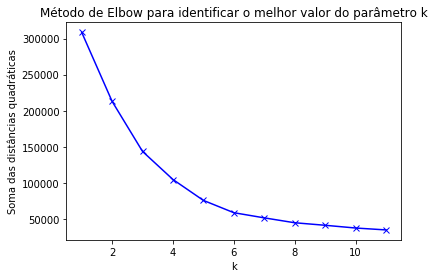

In [12]:
plt.plot(K, Soma_distancia_quadratica, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma das distâncias quadráticas')
plt.title('Método de Elbow para identificar o melhor valor do parâmetro k')
plt.show()

In [34]:
K = range(2,13)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(clientes_dataset)
    s_score=metrics.silhouette_score(clientes_dataset, km.labels_, metric='euclidean',sample_size=tam_pop)
    print('Para n_clusters=', k, 'o valor de silhouette_score é =', s_score)

Para n_clusters= 2 o valor de silhouette_score é = 0.29307334005502633
Para n_clusters= 3 o valor de silhouette_score é = 0.383798873822341
Para n_clusters= 4 o valor de silhouette_score é = 0.4052954330641215
Para n_clusters= 5 o valor de silhouette_score é = 0.4440669204743007
Para n_clusters= 6 o valor de silhouette_score é = 0.45205475380756516
Para n_clusters= 7 o valor de silhouette_score é = 0.43949619264530887
Para n_clusters= 8 o valor de silhouette_score é = 0.42757883696186766
Para n_clusters= 9 o valor de silhouette_score é = 0.41457740954617534
Para n_clusters= 10 o valor de silhouette_score é = 0.4039082956316019
Para n_clusters= 11 o valor de silhouette_score é = 0.372379482786749
Para n_clusters= 12 o valor de silhouette_score é = 0.3591811080128197


Para número de clusters = 2 O valor médio da silhouette é : 0.29307334005502633
Para número de clusters = 3 O valor médio da silhouette é : 0.383798873822341
Para número de clusters = 4 O valor médio da silhouette é : 0.4052954330641215
Para número de clusters = 5 O valor médio da silhouette é : 0.4440669204743008
Para número de clusters = 6 O valor médio da silhouette é : 0.45205475380756527


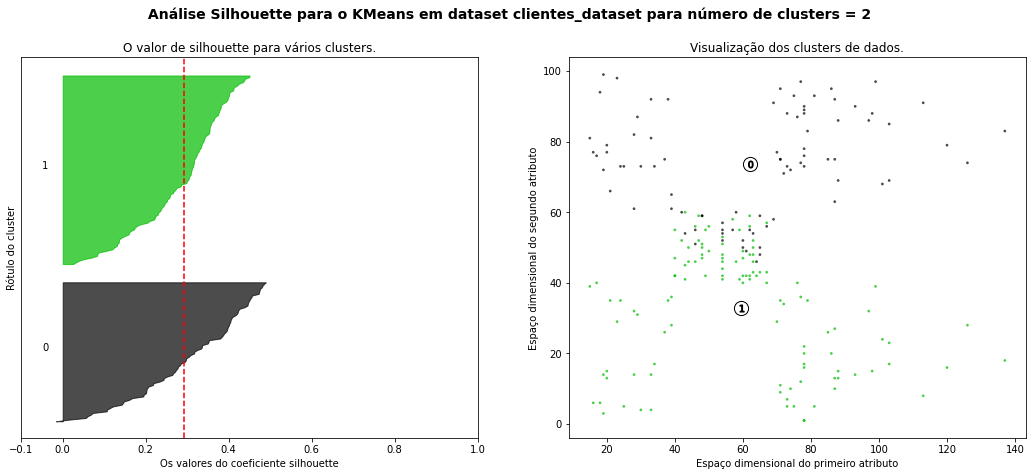

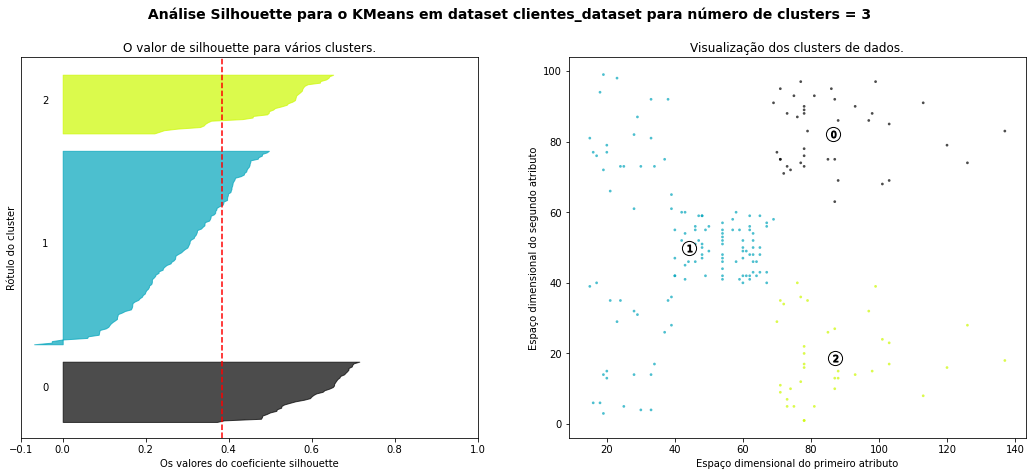

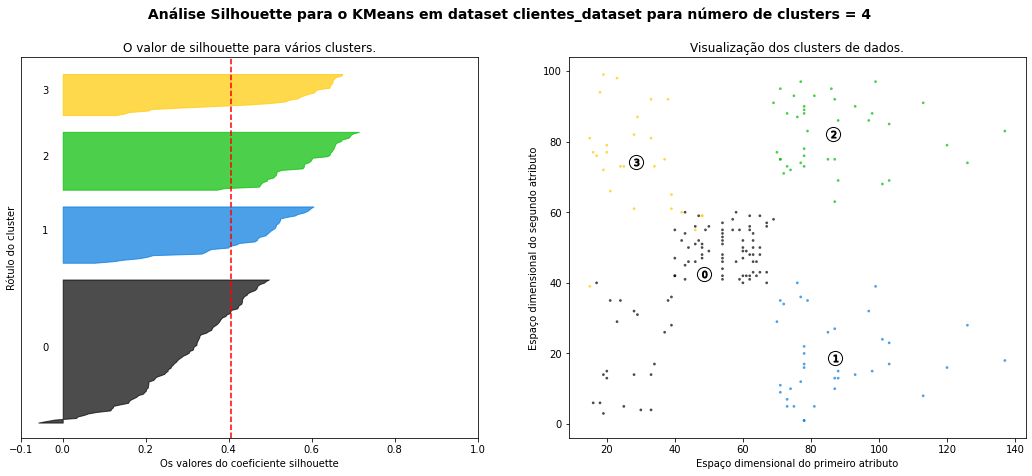

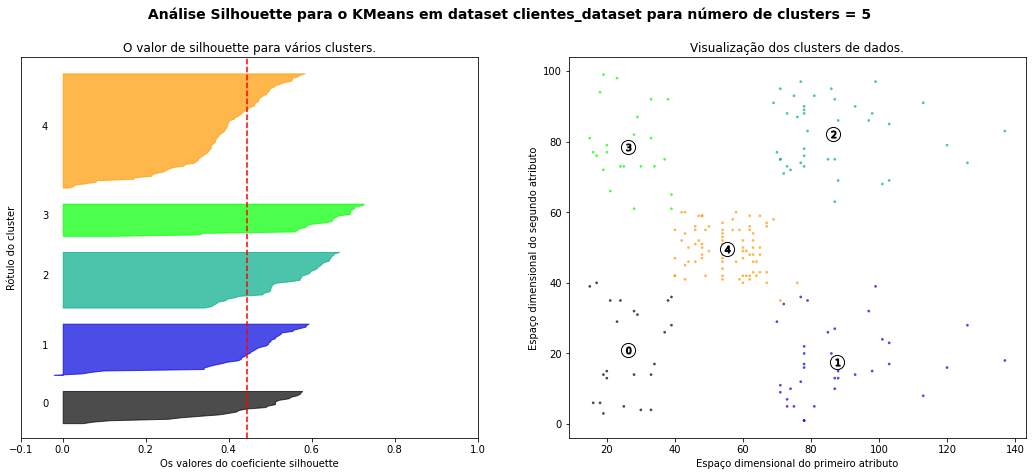

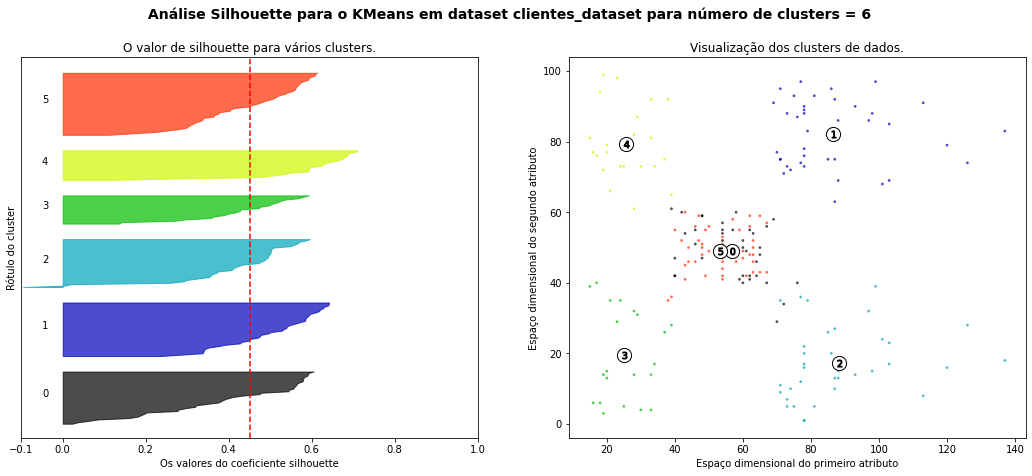

In [35]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6]
X = clientes_dataset.values[:, :5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para número de clusters =", n_clusters,
          "O valor médio da silhouette é :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("O valor de silhouette para vários clusters.")
    ax1.set_xlabel("Os valores do coeficiente silhouette")
    ax1.set_ylabel("Rótulo do cluster")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    # Ajuste aqui os atributos que deseja visualizar
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 2], X[:, 3], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    # Ajuste aqui também os atributos que deseja visualizar
    ax2.scatter(centers[:, 2], centers[:, 3], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[2], c[3], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualização dos clusters de dados.")
    ax2.set_xlabel("Espaço dimensional do primeiro atributo")
    ax2.set_ylabel("Espaço dimensional do segundo atributo")

    plt.suptitle((" Análise Silhouette para o KMeans em dataset clientes_dataset "
                  "para número de clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [38]:
from sklearn.cluster import KMeans
km_melhor_execucao = KMeans(n_clusters=5)
km_melhor_execucao = km_melhor_execucao.fit(clientes_dataset)
print(km_melhor_execucao.cluster_centers_)

[[ 0.53846154 32.69230769 86.53846154 82.12820513]
 [ 0.58227848 43.08860759 55.29113924 49.56962025]
 [ 0.47222222 40.66666667 87.75       17.58333333]
 [ 0.60869565 25.52173913 26.30434783 78.56521739]
 [ 0.60869565 45.2173913  26.30434783 20.91304348]]


In [39]:
print(km_melhor_execucao)

KMeans(n_clusters=5)


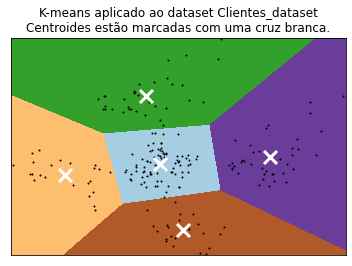

Pontos das centróides:
[[ -4.41026389  -3.10070422]
 [-10.22445521  42.33140596]
 [-44.38675468 -10.05043814]
 [ 41.55103875   1.87087541]
 [  4.98536192 -46.67336912]]
Instâncias clusterizadas:
[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [45]:
numero_clusteres = 5
reduced_data = PCA(n_components=2).fit_transform(clientes_dataset)
kmeans = KMeans(init='k-means++', n_clusters=numero_clusteres, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means aplicado ao dataset Clientes_dataset\n'
          'Centroides estão marcadas com uma cruz branca.')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
print("Pontos das centróides:")
print(kmeans.cluster_centers_)
print("Instâncias clusterizadas:")
print(kmeans.labels_)